In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount the google drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
DATASET_PATH = "/gdrive/My Drive/UTS/assignment/datasets"
#MODEL_SAVE_PATH = "/gdrive/My Drive/UTS/assignment/models"
KAGGLE_SUBMISSION_PATH = "/gdrive/My Drive/UTS/assignment/kaggle-submissions"

In [ ]:
print(DATASET_PATH)

/gdrive/My Drive/UTS/assignment/datasets


In [ ]:
import os
import pandas as pd

def load_data(filename, dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
# Load the training and test set
train_data = load_data("TrainingSet.csv")
test_data = load_data("TestingSet.csv")

# Exploratory Data Analysis (EDA)

In [ ]:
# Let's take a peek at the top few rows of the training set:
train_data.head()

,row ID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STYLE_D,STRUCT,STRUCT_D,GRADE,GRADE_D,CNDTN,CNDTN_D,EXTWALL,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,28915,1605 0050,2.0,0.0,13.0,Hot Water Rad,Y,1.0,6.0,3.0,1926.0,2001.0,1970,2.0,2012-06-13T00:00:00.000Z,810000.0,1,1,1431,1,4.0,2 Story,1.0,Single,6.0,Very Good,3.0,Average,5.0,Stucco,1.0,Comp Shingle,6.0,Hardwood,1.0,1.0,12,3750,2018-07-22T18:01:43.000Z
1,36804,2256 0831,3.0,1.0,1.0,Forced Air,Y,1.0,10.0,4.0,1964.0,2008.0,1992,2.0,1993-06-21T00:00:00.000Z,350000.0,0,1,2904,1,4.0,2 Story,1.0,Single,5.0,Good Quality,4.0,Good,22.0,Brick/Siding,1.0,Comp Shingle,6.0,Hardwood,1.0,2.0,12,7480,2018-07-22T18:01:43.000Z
2,11913,0938 0021,2.0,1.0,1.0,Forced Air,Y,1.0,9.0,3.0,1908.0,NaN,1960,2.0,1900-01-01T00:00:00.000Z,NaN,0,1,1914,1,4.0,2 Story,6.0,Row End,5.0,Good Quality,3.0,Average,14.0,Common Brick,5.0,Metal- Pre,3.0,Wood Floor,1.0,1.0,11,1603,2018-07-22T18:01:43.000Z
3,41326,2588 0025,2.0,1.0,7.0,Warm Cool,Y,2.0,6.0,3.0,1925.0,2016.0,1957,2.0,2000-10-16T00:00:00.000Z,371000.0,1,1,1680,1,4.0,2 Story,7.0,Row Inside,4.0,Above Average,3.0,Average,14.0,Common Brick,6.0,Metal- Sms,6.0,Hardwood,2.0,1.0,24,1760,2018-07-22T18:01:43.000Z
4,88621,5154 0906,1.0,0.0,13.0,Hot Water Rad,N,1.0,6.0,2.0,1923.0,NaN,1936,2.0,2014-02-06T00:00:00.000Z,74900.0,0,1,1024,1,4.0,2 Story,1.0,Single,2.0,Fair Quality,3.0,Average,15.0,Face Brick,1.0,Comp Shingle,6.0,Hardwood,1.0,0.0,12,5000,2018-07-22T18:01:43.000Z


In [ ]:
# dropped the row ID column from the train set as I won’t need this for training the model
train_data = train_data.drop('row ID', axis=1)

In [ ]:
# Function to calculate no. of null values with percentage in the dataframe
def null_values(DataFrame_Name):
    
    sum_null = DataFrame_Name.isnull().sum()
    total_count = DataFrame_Name.isnull().count()
    percent_nullvalues = sum_null/total_count * 100
    df_null = pd.DataFrame()
    df_null['Total_values'] = total_count
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = percent_nullvalues
    df_null = df_null.sort_values(by='Null_Count',ascending = False)

    return(df_null)

In [ ]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("=============\n")
    print("Rows and Columns:")
    print(df.shape)
    print("=============\n")
    print("Column Names:")
    print(df.columns)
    print("=============\n")
    print("Null Values:")
    print(null_values(df))

In [ ]:
describe_data(train_data)

Data Types:
SSL                   object
BATHRM               float64
HF_BATHRM            float64
HEAT                 float64
HEAT_D                object
AC                    object
NUM_UNITS            float64
ROOMS                float64
BEDRM                float64
AYB                  float64
YR_RMDL              float64
EYB                    int64
STORIES              float64
SALEDATE              object
PRICE                float64
QUALIFIED              int64
SALE_NUM               int64
GBA                    int64
BLDG_NUM               int64
STYLE                float64
STYLE_D               object
STRUCT               float64
STRUCT_D              object
GRADE                float64
GRADE_D               object
CNDTN                float64
CNDTN_D               object
EXTWALL              float64
EXTWALL_D             object
ROOF                 float64
ROOF_D                object
INTWALL              float64
INTWALL_D             object
KITCHENS             float64
FI




*   Okay, the 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC','NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'STORIES', 'PRICE', 'STYLE', 'STYLE_D', 'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D','CNDTN','CNDTN_D', 'EXTWALL', 'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL','INTWALL_D', 'KITCHENS', 'FIREPLACES' attributes are sometimes null (less than 75007 non-null), especially the YR_RMDL (53% are null).
*   The PRICE attribute has about 18% null values, so we will need to decide what to do with them. Replacing null values with the median PRICE seems reasonable.




In [ ]:
# Let's take a look at the summary statistics of all the numerical attributes
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BATHRM,74986.0,2.034766,1.071893,0.0,1.0,2.0,3.0,24.0
HF_BATHRM,74985.0,0.608775,0.616843,0.0,0.0,1.0,1.0,11.0
HEAT,74986.0,7.654362,5.040268,0.0,1.0,7.0,13.0,13.0
NUM_UNITS,74986.0,1.199104,0.597179,0.0,1.0,1.0,1.0,6.0
ROOMS,74977.0,7.366766,2.354378,0.0,6.0,7.0,8.0,101.0
BEDRM,74984.0,3.375320,1.154972,0.0,3.0,3.0,4.0,53.0
AYB,74996.0,1930.052589,90.606712,0.0,1914.0,1930.0,1947.0,2019.0
YR_RMDL,34636.0,2000.976903,14.949344,1880.0,1992.0,2006.0,2011.0,2019.0
EYB,75007.0,1965.637221,36.735057,0.0,1955.0,1964.0,1970.0,2018.0
STORIES,74947.0,2.096858,3.477009,0.0,2.0,2.0,2.0,826.0


In [ ]:
# specify which columns are numerical features and which are categorical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).drop(['QUALIFIED'], axis=1).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

In [ ]:
numeric_features

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB',
       'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM',
       'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA'],
      dtype='object')

In [ ]:
categorical_features

Index(['SSL', 'HEAT_D', 'AC', 'SALEDATE', 'STYLE_D', 'STRUCT_D', 'GRADE_D',
       'CNDTN_D', 'EXTWALL_D', 'ROOF_D', 'INTWALL_D', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

In [ ]:
for col in categorical_features.tolist():
    print("==="+col+"===\n") 
    print(train_data[col].value_counts())
    print("\n")

===SSL===

5881S   0004    5
5890    0134    4
5890    0123    3
0786    0820    3
1253    0139    3
               ..
5001W   0024    1
1110    0077    1
2312    0063    1
5517    0002    1
4146    0814    1
Name: SSL, Length: 74966, dtype: int64


===HEAT_D===

Hot Water Rad     30891
Forced Air        22635
Warm Cool         20097
Ht Pump             668
Wall Furnace        163
Water Base Brd      133
Gravity Furnac      101
Elec Base Brd        76
Air-Oil              69
Electric Rad         53
No Data              40
Evp Cool             25
Air Exchng           22
Ind Unit             13
Name: HEAT_D, dtype: int64


===AC===

Y    46501
N    28448
0       37
Name: AC, dtype: int64


===SALEDATE===

1900-01-01T00:00:00.000Z    15941
1999-04-01T00:00:00.000Z      152
2001-01-01T00:00:00.000Z      126
2018-07-03T00:00:00.000Z       46
2006-10-12T00:00:00.000Z       45
                            ...  
1996-05-28T00:00:00.000Z        1
1992-09-18T00:00:00.000Z        1
2001-04-16T00:0

# Pre-Processing

In [ ]:
# Value of '0' in AC column is probably a data error. Replacing '0' with 'N'
train_data['AC'] = train_data['AC'].map( lambda x : 'N' if x == '0' else x)

In [ ]:
train_data['AC'].value_counts()

Y    46501
N    28485
Name: AC, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Explore different models and shortlist the best ones

In [ ]:
# splitting the training data into a train and test set
from sklearn.model_selection import train_test_split
X = train_data.drop('QUALIFIED', axis=1)
y = train_data['QUALIFIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [ ]:
# Baseline Model
from sklearn.dummy import DummyClassifier
dummy_clfr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DummyClassifier())])
dummy_clfr.fit(X_train, y_train)
#dummy_clfr.score(X_test, y_test)  # accuracy
print("model score: %.3f" % dummy_clfr.score(X_test, y_test)) # accuracy

model score: 0.509


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs'),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.774
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.872
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.851
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       mi

In [ ]:
# https://xgboost.readthedocs.io/en/latest/parameter.html
param_grid = {
    'classifier__scale_pos_weight': [1, 3],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__gamma': [2, 5, 10],
    'classifier__max_depth' : [3, 4, 6],
    'classifier__objective' : ['binary:logistic', 'binary:logitraw'],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0.3, 0.6, 1.0],
    'classifier__n_estimators': [600, 800, 1000]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(xgb_clfr, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
xgb_clfr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier(silent=False,
                                                        scale_pos_weight=1,
                                                        learning_rate=0.1,  
                                                        colsample_bytree = 0.8,
                                                        subsample = 0.8,
                                                        objective='binary:logistic',
                                                        n_estimators=1000,
                                                        reg_alpha = 0.3,
                                                        max_depth=6, 
                                                        gamma=10))])
xgb_clfr.fit(X_train, y_train)
print("model score: %.3f" % xgb_clfr.score(X_test, y_test))

model score: 0.902


In [129]:
from sklearn.metrics import confusion_matrix
y_pred = xgb_clfr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

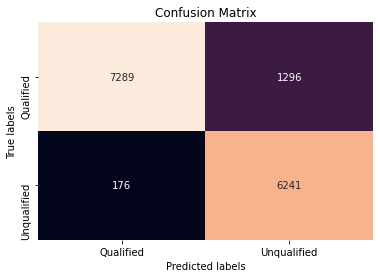

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar=False, fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Qualified', 'Unqualified']); ax.yaxis.set_ticklabels(['Qualified', 'Unqualified']);

In [130]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [131]:
print('Precision is:'+str(round(precision_score(y_test, y_pred),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred, average='binary'),2)))

Precision is:0.83
Recall is:0.97
F1 score is:0.89


# For Kaggle Submission

In [ ]:
test_no_id = test_data.drop('row ID', axis=1)

In [ ]:
test_predictions = xgb_clfr.predict(test_no_id)

In [ ]:
test_predictions

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
Row_ID = test_data['row ID']
submission_df = pd.DataFrame({
                  "row ID": Row_ID, 
                  "QUALIFIED": test_predictions})

In [ ]:
submission_df.head()

,row ID,QUALIFIED
0,41787,0
1,89676,1
2,2028,0
3,53179,0
4,58438,1


In [ ]:
submission_df.to_csv(KAGGLE_SUBMISSION_PATH+'/'+'submission.csv', index=False)